## Project # 2...


##EXPORTACAO AUTOMATICA DOS DADOS VIA SISTEMA WEB

Usar selenium e Chrome driver p/ abrir o navegador
1.	Entrar/abrir sistema Web
    1.1 Importar a senha e password
    1.2 Enter
    
2.	Navegar no sistema ate encontrar os dados
    2.1 Clicar na tab "View all quotes"
    2.2 Clicar na tab "Export All Quotes" -> fez download do excel file

##IMPORTACAO DOS DADOS

3.	Importar a tabela

##TRATAMENTO DOS DADOS

4.	Organizar a planilha p/ gerar qtde de cotacoes somente para Fev. 2022
    4.1 Deletar valores zero da coluna Total
    4.2 Adicionar uma coluna c/ novos valores convertidos
    
##ANALISE DOS DADOS

5.	Calcular a estatistica descritiva
    5.1 Visao geral 
    5.2  Visao estratificada por usuarios

6.	Gerar graficos da principal variavel
    6.1 Visao geral 
    6.2  Visao estratificada por usuarios

##ENVIO DE EMAIL AUTOMATICO COM O INDICADOR (RESULTADO)

7.	Enviar email para o gerente com a qty global e estratificada por usuarios no mes de Fev 2022


##### EXPORTACAO AUTOMATICA DOS DADOS VIA SISTEMA WEB

In [ ]:
## 1 - Entrar no sistema Web

import time
from selenium import webdriver
##from selenium.webdriver.common.by import By

navegador = webdriver.Chrome()                                          # abre um navegador 
navegador.get(r"https://xx.xx.com/auth/login")                          # digite o site especifico

    # 1.1 - Digitar a senha e password

from Senha import EMAIL_KEYLLA, PASSWORD_KEYLLA                                     
navegador.find_element(By.ID,"login").send_keys(EMAIL_KEYLLA)         
navegador.find_element(By.ID,"password").send_keys(PASSWORD_KEYLLA)


    # 1.2 - Enter

navegador.find_element(By.XPATH,"/html/body/div[4]/div[1]/div/form/div/div[4]/div/button").click()  
time.sleep(3)


## 2 - Navegar no sistema ate encontrar os dados
    # 2.1 - Clicar na tab "View all quotes"

navegador.get(r"https://xx.xx.com/order/list_all/quote?rev=6a238da605fbd3cb9e41bcd126250f9c")  # digite o site especifico

time.sleep(5) 


    # 2.2 - Clicar na tab "Export All Quotes"

navegador.find_element(By.ID,"export_quotes").click()       # digite nome do arquivo especifico
time.sleep(7)  # time para fazer o download do arquivo
                                

##### IMPORTACAO DOS DADOS

In [1]:
# 3 - Importar a tabela de dados

import pandas as pd
quotes_df = pd.read_excel(r"Export All quotes.xlsx")

display(quotes_df)


,Username,Quote Number,Status,Created Date,Expiration Date,Closed Date,Canceled Date,Company,Currency,Total,SP,SC,Country
0,Coord.,Q-000002,Canceled,2019-08-28 07:00:00,2019-10-27 07:00:00,NaT,NaT,A,USD,19651.07,1,1,UNITED STATES
1,Coord.,Q-000003,Expired,2019-09-11 07:00:00,2019-11-10 08:00:00,NaT,NaT,A,CAN,24665.64,2,2,Jamaica
2,Coord.,Q-000005,Expired,2019-10-22 07:00:00,2019-12-21 08:00:00,NaT,NaT,A,USD,22509.87,3,3,United States
3,Coord.,Q-000006,Closed,2019-11-25 08:00:00,2019-12-31 08:00:00,NaT,NaT,A,USD,23958.01,4,4,United States
4,Coord.,Q-000008,Closed,2019-12-13 08:00:00,2020-02-11 08:00:00,NaT,NaT,B,USD,18540.95,5,5,UNITED STATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,Coord.,Q-002539,Open,2022-03-09 08:00:00,2022-06-07 07:00:00,NaT,NaT,A,USD,44984.08,2267,2267,UNITED STATES
2267,Coord.,Q-002540,Open,2022-03-09 08:00:00,2022-06-07 07:00:00,NaT,NaT,A,CAN,13520.96,2268,2268,Canada
2268,Coord.,Q-002541,Open,2022-03-09 08:00:00,2022-06-07 07:00:00,NaT,NaT,A,USD,61578.15,2269,2269,UNITED STATES
2269,Coord.,Q-002542,Open,2022-03-09 08:00:00,2022-06-07 07:00:00,NaT,NaT,A,USD,35718.95,2270,2270,United States


In [2]:
# Deletar as colunas q nao necessarias

quotes_df = quotes_df.drop(["Quote Number", "Expiration Date", "Closed Date", "Canceled Date", "Company", "SP", "SC", "Country"], axis = 1) 
display(quotes_df)


,Username,Status,Created Date,Currency,Total
0,Coord.,Canceled,2019-08-28 07:00:00,USD,19651.07
1,Coord.,Expired,2019-09-11 07:00:00,CAN,24665.64
2,Coord.,Expired,2019-10-22 07:00:00,USD,22509.87
3,Coord.,Closed,2019-11-25 08:00:00,USD,23958.01
4,Coord.,Closed,2019-12-13 08:00:00,USD,18540.95
...,...,...,...,...,...
2266,Coord.,Open,2022-03-09 08:00:00,USD,44984.08
2267,Coord.,Open,2022-03-09 08:00:00,CAN,13520.96
2268,Coord.,Open,2022-03-09 08:00:00,USD,61578.15
2269,Coord.,Open,2022-03-09 08:00:00,USD,35718.95


In [3]:
# Deletar linhas c/ valor = zero na coluna Total 

quotes_df.drop(quotes_df[quotes_df['Total'] == 0].index, inplace = True)

display(quotes_df)


,Username,Status,Created Date,Currency,Total
0,Coord.,Canceled,2019-08-28 07:00:00,USD,19651.07
1,Coord.,Expired,2019-09-11 07:00:00,CAN,24665.64
2,Coord.,Expired,2019-10-22 07:00:00,USD,22509.87
3,Coord.,Closed,2019-11-25 08:00:00,USD,23958.01
4,Coord.,Closed,2019-12-13 08:00:00,USD,18540.95
...,...,...,...,...,...
2266,Coord.,Open,2022-03-09 08:00:00,USD,44984.08
2267,Coord.,Open,2022-03-09 08:00:00,CAN,13520.96
2268,Coord.,Open,2022-03-09 08:00:00,USD,61578.15
2269,Coord.,Open,2022-03-09 08:00:00,USD,35718.95


In [4]:
# Deletar linhas c/ valor = zero na coluna Total 

quotes_df.drop(quotes_df[quotes_df['Total'] == 1].index, inplace = True)

display(quotes_df)


,Username,Status,Created Date,Currency,Total
0,Coord.,Canceled,2019-08-28 07:00:00,USD,19651.07
1,Coord.,Expired,2019-09-11 07:00:00,CAN,24665.64
2,Coord.,Expired,2019-10-22 07:00:00,USD,22509.87
3,Coord.,Closed,2019-11-25 08:00:00,USD,23958.01
4,Coord.,Closed,2019-12-13 08:00:00,USD,18540.95
...,...,...,...,...,...
2266,Coord.,Open,2022-03-09 08:00:00,USD,44984.08
2267,Coord.,Open,2022-03-09 08:00:00,CAN,13520.96
2268,Coord.,Open,2022-03-09 08:00:00,USD,61578.15
2269,Coord.,Open,2022-03-09 08:00:00,USD,35718.95


In [5]:
# Criar uma nova coluna com os valores da coluna Total convertida de acordo com a currency
   # if Currency == CAN; -> valor do Total * 1,  #UK = 0.57931, #EUR = 0.68966, #USD = 0.77931
   # quotes_df.loc[(quotes_df['Currency'] == 'USD'), 'New_Total'] = quotes_df['Total'] * 0.77931
    
 
def currency_adjust():   
    quotes_df.loc[(quotes_df['Currency'] == 'USD'), 'New_Total'] = quotes_df['Total'] * 0.77931
    quotes_df.loc[(quotes_df['Currency'] == 'UK'),  'New_Total'] = quotes_df['Total'] * 0.57931
    quotes_df.loc[(quotes_df['Currency'] == 'EUR'), 'New_Total'] = quotes_df['Total'] * 0.68966
    quotes_df.loc[(quotes_df['Currency'] == 'CAN'), 'New_Total'] = quotes_df['Total'] * 1.0000

currency_adjust()  

display(quotes_df)  


,Username,Status,Created Date,Currency,Total,New_Total
0,Coord.,Canceled,2019-08-28 07:00:00,USD,19651.07,15314.275362
1,Coord.,Expired,2019-09-11 07:00:00,CAN,24665.64,24665.640000
2,Coord.,Expired,2019-10-22 07:00:00,USD,22509.87,17542.166790
3,Coord.,Closed,2019-11-25 08:00:00,USD,23958.01,18670.716773
4,Coord.,Closed,2019-12-13 08:00:00,USD,18540.95,14449.147745
...,...,...,...,...,...,...
2266,Coord.,Open,2022-03-09 08:00:00,USD,44984.08,35056.543385
2267,Coord.,Open,2022-03-09 08:00:00,CAN,13520.96,13520.960000
2268,Coord.,Open,2022-03-09 08:00:00,USD,61578.15,47988.468077
2269,Coord.,Open,2022-03-09 08:00:00,USD,35718.95,27836.134924


In [6]:
# Filtrar os dados para apenas o mes de fev 2022 - coluna: Created Date 01/02/2022 ate 28/02/2022

fevereiro = (quotes_df['Created Date'] >= '2022-02-01') & (quotes_df['Created Date'] <= '2022-02-28')

nova_tabela = quotes_df.loc[fevereiro]   #checar como essa fc funciona

display(nova_tabela)


,Username,Status,Created Date,Currency,Total,New_Total
2083,Coord.,Closed,2022-02-01 08:00:00,USD,42723.14,33294.570233
2084,Coord.,Open,2022-02-01 08:00:00,CAN,114363.46,114363.460000
2087,Coord.,Closed,2022-02-01 08:00:00,USD,9231.25,7194.005437
2088,Coord.,Closed,2022-02-01 08:00:00,USD,10604.42,8264.130550
2089,Coord.,Open,2022-02-01 08:00:00,USD,25774.60,20086.403526
...,...,...,...,...,...,...
2210,Coord.,Closed,2022-02-25 08:00:00,CAN,33845.17,33845.170000
2211,GV,Open,2022-02-25 08:00:00,CAN,72590.99,72590.990000
2212,GV,Closed,2022-02-25 08:00:00,CAN,19297.47,19297.470000
2213,GV,Open,2022-02-25 08:00:00,USD,133167.01,103778.382563


##### ANALISE DOS DADOS

In [24]:
# Calcular estatistica descritiva (geral) p/ quantidade total de quotes criados (New_Total) - mes fev 2022

# Estatistica descritiva da variavel New_Total (Total convertida para $CAD) - mes fev 2022
#round(nova_tabela["New_Total"].describe())

#No periodo avaliado, foram criadas 130 cotacoes totalizando a possibilidade de vendas no valor total de CAD$4432975
#50% das cotacoes criadas tiveram valores menors que CAD$20109.0. Ja o valor medio das cotacoes foi de CAD$34100
#variando em +- 41193. Como ha outliers (valores mto discrepantes) e esses podem interferir nesse valor da media, 
# a sugestao seria entende-los e se possivel retira-los e analisar os dados sem eles. Outro ponto a se perceber eh q
# os valores das cotacoes foram mais parecidos (menos variabilidade) para valores menores que 50% (mediana), ja
# p os valores das cotacoes maiores que 50% a variacao dos valores das cotacoes foi bem maior. 


#round(nova_tabela.agg({"New_Total": ["count", "mean", "std", "min", "max", "median", "sum"],}))
round(nova_tabela["New_Total"].describe())


count       130.0
mean      34100.0
std       41193.0
min         534.0
25%       10595.0
50%       20109.0
75%       42183.0
max      303461.0
Name: New_Total, dtype: float64

In [25]:
# Construcao do box-plot mostrando todos os individuais valores
# Ha 9 outliers interferindo nos valores da media e mediana. O ideal seria entender esses e caso possivel retira-los
# p/ uma interpretacao mais fiel.

px.box(nova_tabela, x="New_Total", points="all")

<AxesSubplot:title={'center':'Qty quote created in Feb 2022'}, xlabel='Created Date'>

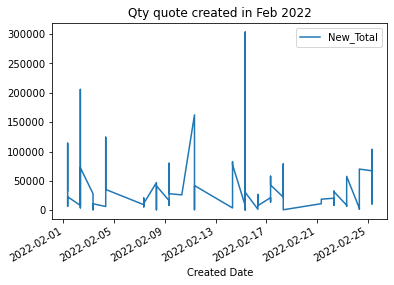

In [31]:
# Criar grafico sequencial mostrando qtde quotes criados no mes de fev. 2022 p/ variavel New_Total (geral) / CAN$

nova_tabela.plot(x='Created Date', y='New_Total', title='Qty quote created in Feb 2022')


In [20]:
# Calcular o total de cotacoes (variavel New_Total / CAN$)
# No periodo avaliado, houveram 
df  = quotes_df.loc[fevereiro] 
Total_final = round(df["New_Total"].sum() , 2)
print(Total_final)


4432974.9


In [9]:
# Listar os subgrupos p/ calcular a estatistica estratificada. 
#Existem 2 tipos de grupos que criam as cotacoes: Coord. e GV.

quotes_df["Username"].unique()


array(['Coord.', 'GV'], dtype=object)

In [44]:
#Contando quantas cotacoes foram criadas por cada tipo de usuario
#Os coord. criaram 73 e os GV criaram 57 cotacoes no periodo de fev. 2022

qty_quote_created = nova_tabela["Username"].value_counts() # criada uma nova variavel "qty_quote_created" q recebe ...


In [37]:
#Contando quantas cotacoes foram criadas por cada tipo de usuario
qty_quote_created  

Coord.    73
GV        57
Name: Username, dtype: int64

In [38]:
#Definindo o eixo label (nomes)

qty_quote_created.index


Index(['Coord.', 'GV'], dtype='object')

In [39]:
#Definindo o eixo qtde 

qty_quote_created.values


array([73, 57], dtype=int64)

In [42]:
#Construindo o grafico de pizza 
# Os coordenadores criam mais cotacoes que os proprios GV (Vendedores)

px.pie(qty_quote_created, names=qty_quote_created.index, values=qty_quote_created.values)


In [10]:
# Estatistica descritiva da variavel New_Total estratificada por username / CAN$ - mes fev 2022 
  
# quotes_df.New_Total.describe()/ quotes_df['New_Total'].describe()
round(nova_tabela.groupby("Username").New_Total.agg(["count", "mean", "std", "min", "max", "median"]))


,count,mean,std,min,max,median
Username,,,,,,
Coord.,73,34350.0,37631.0,1092.0,205892.0,19902.0
GV,57,33779.0,45695.0,534.0,303461.0,21784.0


In [43]:
# Criar grafico sequencial mostrando qtde quotes criados no mes de fev. 2022 p/ variavel New_Total 
#estratificada) / CAN$

import plotly.express as px
import matplotlib.pyplot as pl 

px.box(nova_tabela, x="New_Total", y="Username", 
       title="Box-plot p/ cotacoes - periodo: fev. 2022 / estratificadas por grupo de usuarios")

#####  ENVIO DE EMAIL AUTOMATICO (GMAIL) - INDICADOR (QTY TOTAL DE QUOTES - PERIODO FEV 2022)

In [ ]:
# 7 - Enviar email para o gerente com a qty global e estratificada por usuarios no mes de Fev 2022

from Senha1 import EMAIL_KEYLLA, PASSWORD_KEYLLA

import pandas as pd
import smtplib
import email.message
                                                               # precisa dessas 2 bibliotecas para fazer o codigo funcionar
def enviar_email():                                            # fc que envia email

    qty_total_quote = 130
    qty_total_quote_Coord = 73
    qty_total_quote_GV = 57                                                           
    
    
    corpo_email =  f"""                                                             
    <p>Dear Customer,</p>
    <p>Please see the quote report related to the <b>QTY OF QUOTES CREATED in February, 2022:</b></p>
    <p>Total quotes:{qty_total_quote}</p>
    <p>Total quotes created by the Coordinators:{qty_total_quote_Coord}</p>
    <p>Total quotes created by Sales Team - GV:{qty_total_quote_GV}</p>
    <p>If you have any questions, please let us know.</p>
    <p>Best regards,</p>
    <p>Analytics team</p>
    """
    
    
    msg = email.message.Message()                                # cria o email
    msg['Subject'] = "Monthly Quote Report"                      # define esses parametros
    msg['From'] = 'keyllacristianerodrigues@gmail.com'
    msg['To'] = 'keyllacristianerodrigues+1@gmail.com'
    password = PASSWORD_KEYLLA                                   # digitar a senha do email no "From" aqui ou importar o arquivo extra c a senha.py
    msg.add_header('Content-Type', 'text/html')
    msg.set_payload(corpo_email)
    
   
   
    s = smtplib.SMTP('smtp.gmail.com: 587')
    s.starttls()                                         #faz conexao de forma segura c/o email. Essa parte toda eh para enviar a mns
    #Login credentials for sending the mail
    s.login(msg['From'], password)
    s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    print('Email enviado') 
                                                
 

In [ ]:
enviar_email()